# WGAN Horse Analysis

In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
from models.GAN import build_generator, build_critic
from torchvision import datasets, transforms

bs = 128
z_dim = 100

transform = transforms.Compose([transforms.ToTensor()])
ds = datasets.CIFAR10(root='./data', download=True, transform=transform)
ds.targets = t.tensor(ds.targets)
idx = ds.targets == 7  # 7 is the label for horses
ds.targets = ds.targets[idx]
ds.data = ds.data[idx.numpy().astype(np.bool)]
dl = DataLoader(dataset=ds, batch_size=bs, shuffle=False, drop_last=True)

Files already downloaded and verified


In [2]:
generator = build_generator(gen_init_size=(128, 4, 4), gen_upsample_flags=[True, True, True, False],
                            gen_c=[128, 64, 32, 3], gen_ks=[5, 5, 5, 5], gen_strides=[1, 1, 1, 1],
                            gen_pads=[2, 2, 2, 2], z_dim=z_dim, output_act=t.nn.Tanh, 
                            leaky_relu=True, first_gen_c=128)

critic = build_critic(ds[0][0][None], critic_c=[3, 32, 64, 128, 128], critic_ks=[5, 5, 5, 5],
                      critic_strides=[2, 2, 2, 1], critic_pads=[2, 2, 2, 2], wgan=True, leaky_relu=True)

generator.load_state_dict(t.load('models/state_dicts/04_02_horse_gen.pth'))
critic.load_state_dict(t.load('models/state_dicts/04_02_horse_critic.pth'))

device = t.device('cuda') if t.cuda.is_available() else 'cpu'
generator.cuda(device)
critic.cuda(device)

Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.4)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (4): LeakyReLU(negative_slope=0.2)
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Dropout(p=0.4)
  (7): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (8): LeakyReLU(negative_slope=0.2)
  (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): Dropout(p=0.4)
  (11): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (12): LeakyReLU(negative_slope=0.2)
  (13): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (14): Dropout(p=0.4)
  (15): Flatten()
  (16): Linear(in_features=2048, out_features=1, bias=True)
)

/home/p/.installed_software/anaconda3/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow 

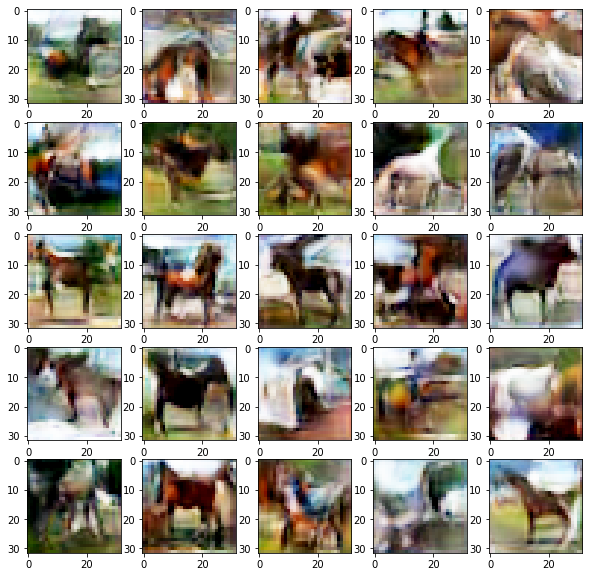

In [3]:
row, col = 5, 5

f, axarr = plt.subplots(row, col, figsize=(10, 10))

for r in range(row):
    for c in range(col):
        images = generator(t.randn(2, z_dim).to(device)).cpu().detach()[0].permute(1, 2, 0)
        axarr[r, c].imshow(images)